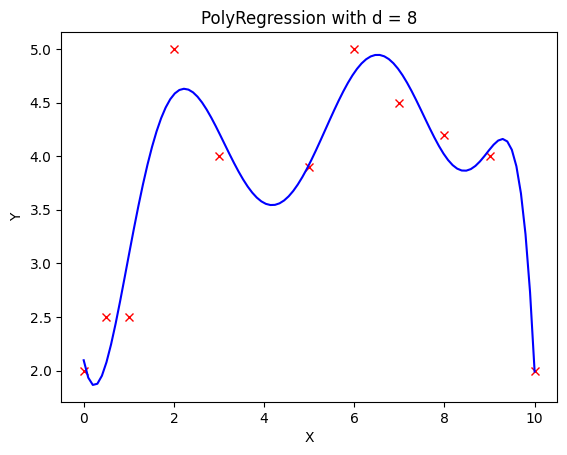

In [1]:
# Run test polyreg univariate.py

import numpy as np
import matplotlib.pyplot as plt
from polyreg import PolynomialRegression

if __name__ == "__main__":
    '''
        Main function to test polynomial regression
    '''

    # load the data
    filePath = "data/polydata.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = allData[:, 0]
    y = allData[:, 1]

    # regression with degree = d
    d = 8
    model = PolynomialRegression(degree = d, regLambda = 0)
    model.fit(X, y)
    
    # output predictions
    xpoints = np.linspace(np.max(X), np.min(X), 100).T
    ypoints = model.predict(xpoints)

    # plot curve
    plt.figure()
    plt.plot(X, y, 'rx')
    plt.title('PolyRegression with d = '+str(d))
    # plt.hold(True)
    plt.plot(xpoints, ypoints, 'b-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11204\2688610863.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,maxY))
C:\Users\Admin\AppData\Local\Temp\ipykernel_11204\2688610863.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,maxY))
C:\Users\Admin\AppData\Local\Temp\ipykernel_11204\2688610863.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,maxY))
C:\Users\Admin\AppData\Local\Temp\ipykernel_11204\2688610863.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,maxY))
C:\Users\Admin\AppData\Local\Temp\ipykernel_11204\2688610863.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,maxY))
C:\Users\Admin\AppData\Local\Temp\ipykernel_11204\2688610863.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis 

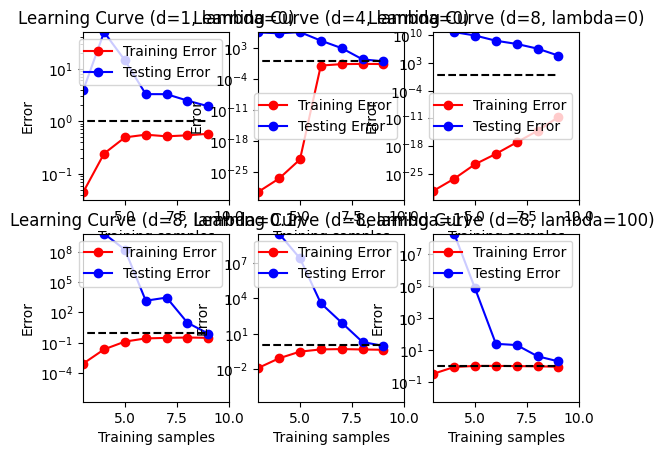

In [2]:
# run test_polyreg_learningCurve.py


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from polyreg import PolynomialRegression

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import cross_validation
from sklearn.model_selection import LeaveOneGroupOut
# from sklearn.model_selection import LeaveOneOut

from polyreg import learningCurve




#----------------------------------------------------
# Plotting tools

def plotLearningCurve(errorTrain, errorTest, regLambda, degree):
    '''
        plot computed learning curve
    '''
    minX = 3
    maxY = max(errorTest[minX+1:])

    xs = np.arange(len(errorTrain))
    plt.plot(xs, errorTrain, 'r-o')
    # plt.hold(True)
    plt.plot(xs, errorTest, 'b-o')
    plt.plot(xs, np.ones(len(xs)), 'k--')
    # plt.hold(False)
    plt.legend(['Training Error', 'Testing Error'], loc = 'best')
    plt.title('Learning Curve (d='+str(degree)+', lambda='+str(regLambda)+')')
    plt.xlabel('Training samples')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.ylim((0,maxY))
    plt.xlim((minX,10))


def generateLearningCurve(X, y, degree, regLambda):
    '''
        computing learning curve via leave one out CV
    '''

    n = len(X);
    
    errorTrains = np.zeros((n, n-1));
    errorTests = np.zeros((n, n-1));
    
    # loo = cross_validation.LeaveOneOut(n)
    loo = LeaveOneGroupOut()
    itrial = 0
    for train_index, test_index in loo.split(X, y, groups=X):
        #print("TRAIN indices:", train_index, "TEST indices:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        (errTrain, errTest) = learningCurve(X_train, y_train, X_test, y_test, regLambda, degree)

        errorTrains[itrial, :] = errTrain
        errorTests[itrial, :] = errTest
        itrial = itrial + 1

    errorTrain = errorTrains.mean(axis = 0)
    errorTest = errorTests.mean(axis = 0)

    plotLearningCurve(errorTrain, errorTest, regLambda, degree)




#-----------------------------------------------

if __name__ == "__main__":
    '''
        Main function to test polynomial regression
    '''

    # load the data
    filePath = "data/polydata.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = allData[:, 0]
    y = allData[:, 1]

    # generate Learning curves for different params
    plt.subplot(2, 3, 1)
    generateLearningCurve(X, y, 1, 0);
    plt.subplot(2, 3, 2)
    generateLearningCurve(X, y, 4, 0);
    plt.subplot(2, 3, 3)
    generateLearningCurve(X, y, 8, 0);
    plt.subplot(2, 3, 4)
    generateLearningCurve(X, y, 8, .1);
    plt.subplot(2, 3, 5)
    generateLearningCurve(X, y, 8, 1);
    plt.subplot(2, 3, 6)
    generateLearningCurve(X, y, 8, 100);
    plt.show()


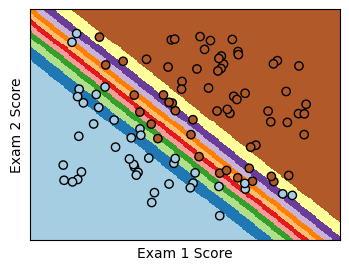

In [3]:
# run test_logreg1.py

from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt
from logreg import LogisticRegression

if __name__ == "__main__":
    # Load Data
    filename = 'data/data1.dat'
    data = loadtxt(filename, delimiter=',')
    X = data[:, 0:2]
    y = np.array([data[:, 2]]).T
    n,d = X.shape
    
    # Standardize the data
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    
    # train logistic regression
    logregModel = LogisticRegression(regLambda = 0.00000001)
    logregModel.fit(X,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logregModel.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()
